In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train = pd.read_csv("data/train.csv", index_col=0)

In [3]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.describe(include="all")

,keyword,location,text,target
count,7552,5080,7613,7613.00000
unique,221,3341,7503,NaN
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,45,104,10,NaN
mean,NaN,NaN,NaN,0.42966
std,NaN,NaN,NaN,0.49506
min,NaN,NaN,NaN,0.00000
25%,NaN,NaN,NaN,0.00000
50%,NaN,NaN,NaN,0.00000
75%,NaN,NaN,NaN,1.00000


In [5]:
corpus = " ".join([t.strip() for t in train["text"].to_list()])

In [6]:
len(corpus)

776806

In [7]:
corpus[:100]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all Forest fire near La Ronge Sask'

In [8]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [9]:
%%time

doc = nlp(corpus)

Wall time: 15.9 s


In [10]:
from spacy.lang.en.stop_words import STOP_WORDS

In [11]:
import wordcloud

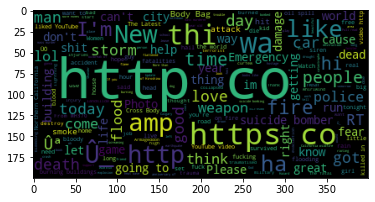

In [12]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud);

In [13]:
vocabulary_set = set([t.lemma_ for t in doc if t.lemma_ not in STOP_WORDS])
len(vocabulary_set)

23590

In [23]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]
corpus_lemma = " ".join(lemma)
import pandas as pd
lemmadf = pd.Series(lemma)
common = lemmadf.value_counts()>10
common = common[common]
new_stop_words = common.index
STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

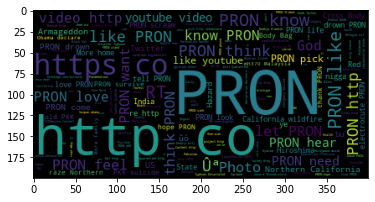

In [24]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS_updated)
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud);